# Import and warehouse data:

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error


In [3]:
df_Normal=pd.read_csv('Part1 - Normal.csv')
df_TypeH=pd.read_csv('Part1 - Type_H.csv')
df_TypeS=pd.read_csv('Part1 - Type_S.csv')

In [4]:
print(df_Normal.shape)
df_Normal.head()

(100, 7)


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [5]:
print(df_TypeH.shape)
df_TypeH.head()

(60, 7)


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [6]:
print(df_TypeS.shape)
df_TypeS.head()

(150, 7)


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [7]:
df=[df_Normal,df_TypeH,df_TypeS]

In [8]:
df=df_Normal.merge(df_TypeH,how='outer',left_index=False )

In [9]:
df=df.merge(df_TypeS,how='outer',left_index=False)

In [10]:
print(df.shape)
df.head()

(310, 7)


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


# Data cleansing:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [12]:
df.dropna()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [13]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [14]:
df['Class'].unique()

array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

In [15]:
df['Class'] = df['Class'].replace('Nrmal', 'Normal')
df['Class'] = df['Class'].replace('type_h', 'Type_H')
df['Class'] = df['Class'].replace('tp_s', 'Type_S')

In [16]:
df['Class'].unique()

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

# Data analysis & visualisation:

<AxesSubplot:title={'center':'L_angle'}, xlabel='L_angle', ylabel='Density'>

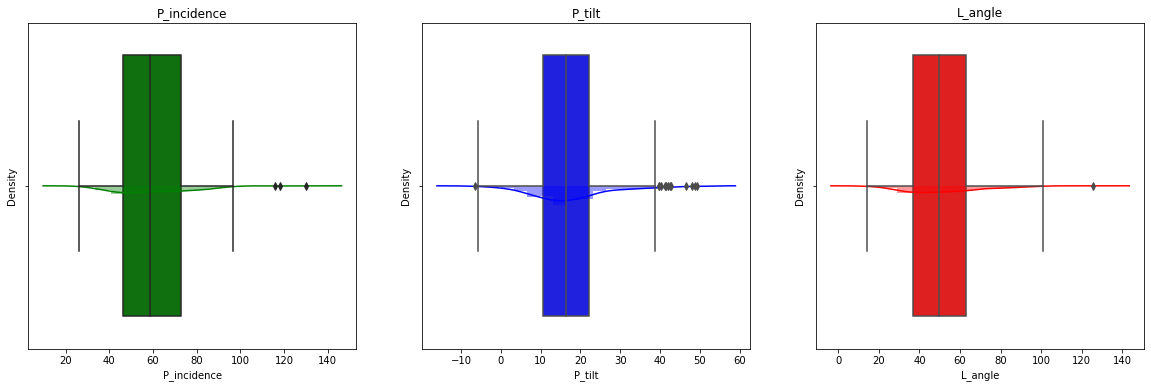

In [17]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('P_incidence')
sns.distplot(df['P_incidence'],color='green')

plt.subplot(1,3,2)
plt.title('P_tilt')
sns.distplot(df['P_tilt'],color='blue')

plt.subplot(1,3,3)
plt.title('L_angle')
sns.distplot(df['L_angle'],color='red')

# #boxplot
plt.subplot(1, 3, 1)
plt.title('P_incidence')
sns.boxplot(df['P_incidence'],orient='vertical',color='green')

plt.subplot(1,3,2)
plt.title('P_tilt')
sns.boxplot(df['P_tilt'],orient='vertical',color='blue')

plt.subplot(1,3,3)
plt.title('L_angle')
sns.boxplot(df['L_angle'],orient='vertical',color='red')

#plt.show()

<AxesSubplot:title={'center':'S_Degree'}, xlabel='S_Degree'>

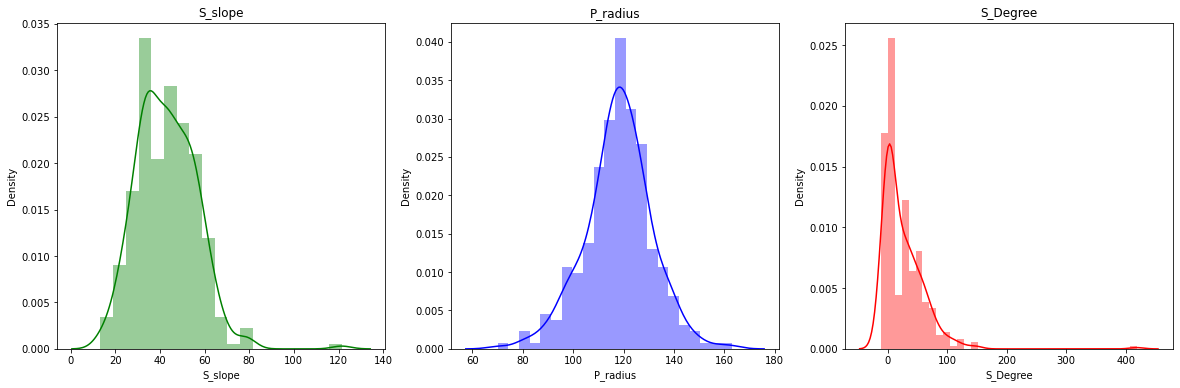

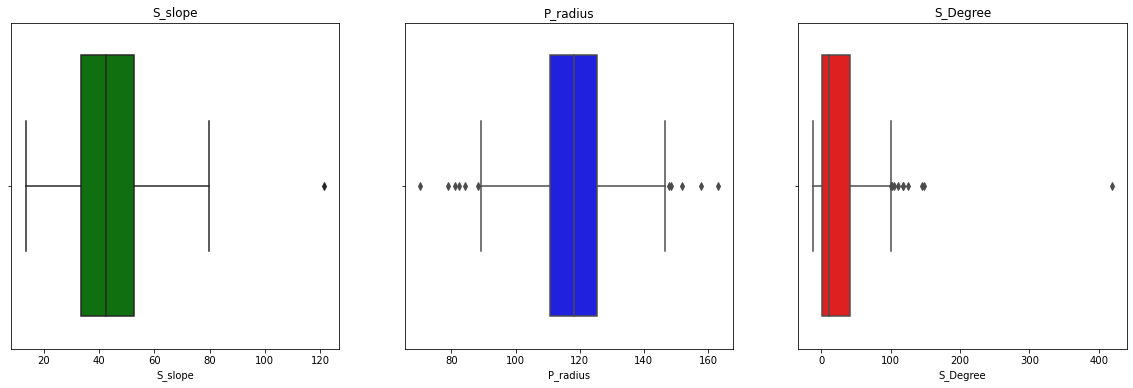

In [18]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('S_slope')
sns.distplot(df['S_slope'],color='green')

plt.subplot(1,3,2)
plt.title('P_radius')
sns.distplot(df['P_radius'],color='blue')

plt.subplot(1,3,3)
plt.title('S_Degree')
sns.distplot(df['S_Degree'],color='red')

#
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('S_slope')
sns.boxplot(df['S_slope'],orient='vertical',color='green')

plt.subplot(1,3,2)
plt.title('P_radius')
sns.boxplot(df['P_radius'],orient='vertical',color='blue')

plt.subplot(1,3,3)
plt.title('S_Degree')
sns.boxplot(df['S_Degree'],orient='vertical',color='red')


In [19]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [20]:
df.groupby(["Class"]).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,100,100,100,100,100,100
Type_H,60,60,60,60,60,60
Type_S,150,150,150,150,150,150


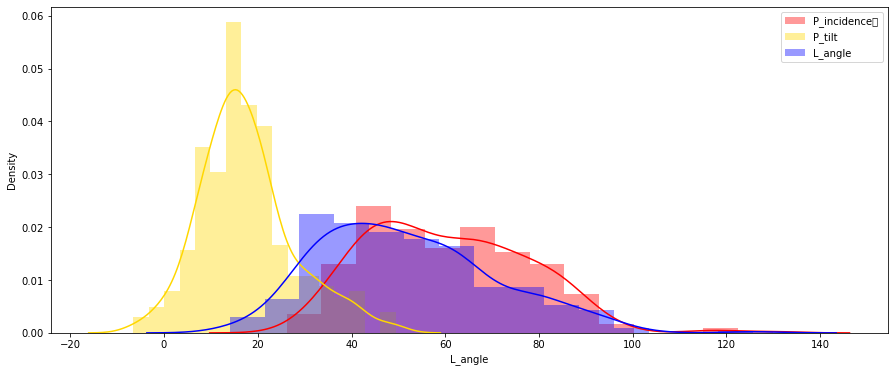

In [21]:
plt.figure(figsize=(15,6))
sns.distplot(df['P_incidence'], color = 'Red', label = 'P_incidence	')
sns.distplot(df['P_tilt'], color = 'Gold', label = 'P_tilt')
sns.distplot(df['L_angle'], color = 'blue', label = 'L_angle')
plt.legend()
plt.show()

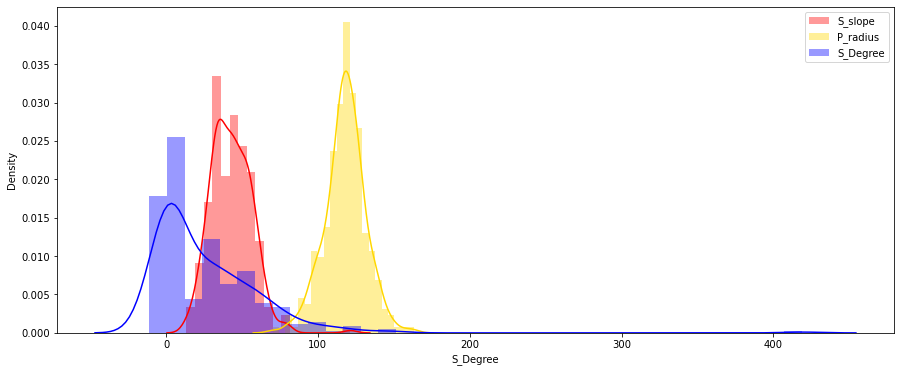

In [22]:
plt.figure(figsize=(15,6))
sns.distplot(df['S_slope'], color = 'Red', label = 'S_slope')
sns.distplot(df['P_radius'], color = 'Gold', label = 'P_radius')
sns.distplot(df['S_Degree'], color = 'blue', label = 'S_Degree')
plt.legend()
plt.show()

In [23]:
X=df.drop(labels= 'Class',axis=1)
y=df['Class']
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [25]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,8.702716e-17,2.326096e-16,1.980495e-16,5.121351e-17,-6.274551e-16,-8.156558e-17
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


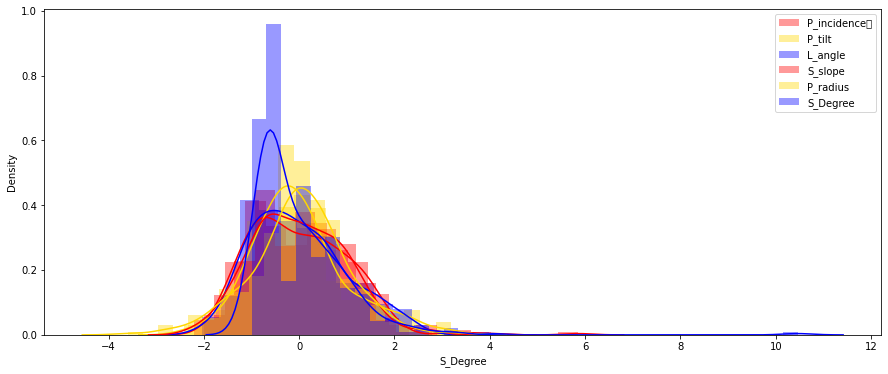

In [26]:
plt.figure(figsize=(15,6))
sns.distplot(XScaled['P_incidence'], color = 'Red', label = 'P_incidence	')
sns.distplot(XScaled['P_tilt'], color = 'Gold', label = 'P_tilt')
sns.distplot(XScaled['L_angle'], color = 'blue', label = 'L_angle')
sns.distplot(XScaled['S_slope'], color = 'Red', label = 'S_slope')
sns.distplot(XScaled['P_radius'], color = 'Gold', label = 'P_radius')
sns.distplot(XScaled['S_Degree'], color = 'blue', label = 'S_Degree')
plt.legend()
plt.show()

# Model training, testing and tuning:

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XScaled,y,test_size=0.30,random_state=1)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'distance' )

In [29]:
NNH.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=21, weights='distance')

In [30]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8064516129032258

In [31]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

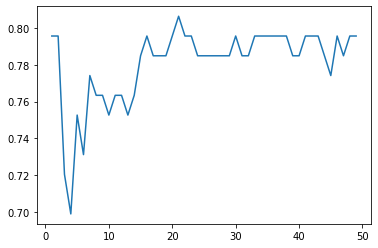

In [32]:
plt.plot(range(1,50),scores)

Confusion Matrix


<AxesSubplot:>

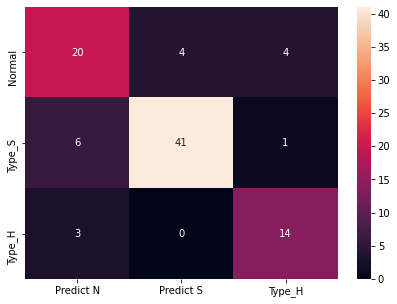

In [33]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Normal","Type_S","Type_H"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_S","Type_H"]],
                  columns = [i for i in ["Predict N","Predict S","Type_H"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [37]:
# creating odd list of K for KNN
myList = list(range(1, 30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold accuracy scores
accuracy_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    # predict the response
    y_predictKNN = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_predictKNN)
    accuracy_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in accuracy_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is: ', optimal_k)

The optimal number of neighbors is:  1


Accuracy Score of Training Data:  1.0

Accuracy Score of Test Data:  0.7956989247311828

Classification Report of KNN Model:
                precision    recall  f1-score   support

      Normal       0.69      0.71      0.70        28
      Type_H       0.65      0.65      0.65        17
      Type_S       0.91      0.90      0.91        48

    accuracy                           0.80        93
   macro avg       0.75      0.75      0.75        93
weighted avg       0.80      0.80      0.80        93


Confusion Matrix of KNN:
 [[20  4  4]
 [ 6 11  0]
 [ 3  2 43]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap')

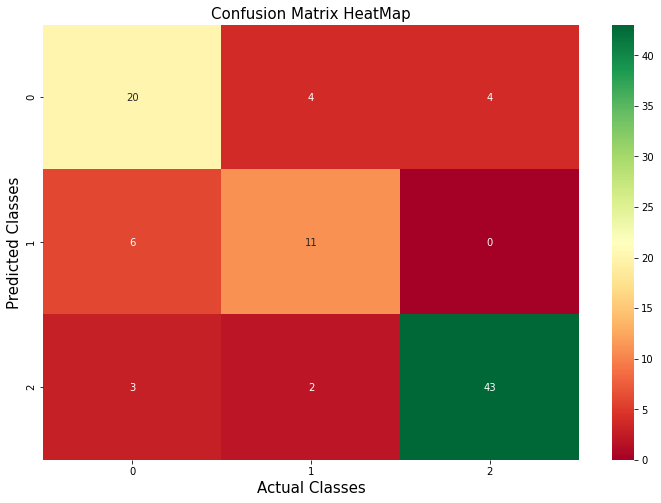

In [41]:
#Using optimal_k from above as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = optimal_k)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_predictKNN = knn.predict(X_test)

# evaluate accuracy
print('Accuracy Score of Training Data: ', knn.score(X_train, y_train))
modelKNN_score = accuracy_score(y_test,y_predictKNN)

cfm_KNN = confusion_matrix(y_test, y_predictKNN)
print('\nAccuracy Score of Test Data: ', modelKNN_score)
print('\nClassification Report of KNN Model:\n ', classification_report(y_test, y_predictKNN))
#print('\nMean Absolute Error of KNN:\n', mean_absolute_error(y_test, y_predictKNN))
print('\nConfusion Matrix of KNN:\n', cfm_KNN)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(cfm_KNN, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15)

# Conclusion and improvisation:

The Accuracy score of Training and Test Data is different but close which can signify accuracy in the model, the model can be optimised even more with Grid Search To Optimise Hyperparameter Combination and Continuously Tune The Parameters To Further Improve Accuracy.

quality: Quality of dataset was good, as number of outliers were less and null values were minimum.

quantity:Quantity of data can be increased to improve the optimisation of model.

variety:Improvement in variety of data can increase the implimentation of the presented model.
